# Time Series: Forecasting Bitcoin price

In [1]:
# Importing TF and checking the version
import tensorflow as tf

print(tf.__version__)

2.10.1


### Importing time series with Pandas

In [2]:
# Reading Bitcoin data and parsing dates
import pandas as pd

df = pd.read_csv(
    "BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
    parse_dates=["Date"],
    index_col=["Date"]   
)
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [3]:
df.tail()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292
2021-05-17,BTC,45604.615754,46805.537852,49670.414174,43868.638969
2021-05-18,BTC,43144.471291,46439.336570,46622.853437,42102.346430


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [5]:
len(df)

2787

In [6]:
# Separating closing prices for each day
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)":"Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


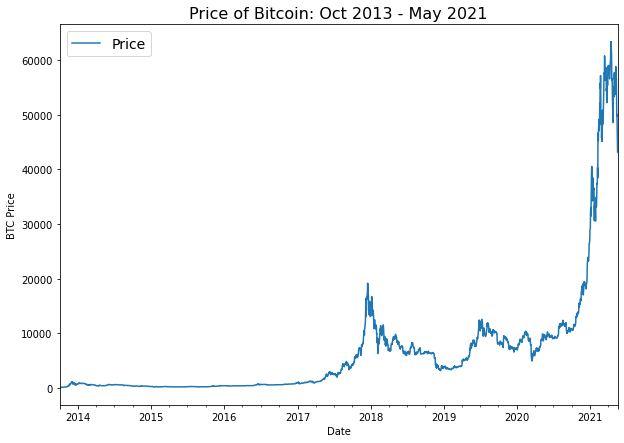

In [7]:
# Visualising Bitcoin prices
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10, 7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin: Oct 2013 - May 2021", fontsize=16)
plt.legend(fontsize=14);

### Importing time series with Python

In [8]:
# Importing Bitcoin data with Python
import csv
from datetime import datetime

timestamps = []
btc_price = []
with open("BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", "r") as f:
    csv_reader = csv.reader(f, delimiter=",")
    next(csv_reader) # Skips first line to remove column names
    for line in csv_reader:
        timestamps.append(datetime.strptime(line[1], "%Y-%m-%d"))
        btc_price.append(float(line[2]))

# Viewing first 10 records
timestamps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

Text(0.5, 1.0, 'Price of Bitcoin: Oct 2013 - May 2021')

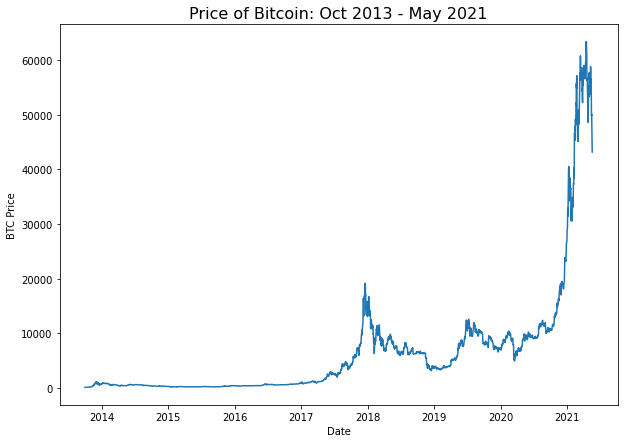

In [9]:
# Plotting from CSV
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 7))
plt.plot(timestamps, btc_price)
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin: Oct 2013 - May 2021", fontsize=16)
#plt.legend();

### Creating train and test data

In [10]:
# Get Bitcoin date array
timestamps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timestamps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [11]:
# Wrong way to create train / test split for time series data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    timestamps, # dates
    prices, # BTC prices
    test_size=0.2,
    random_state=42
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

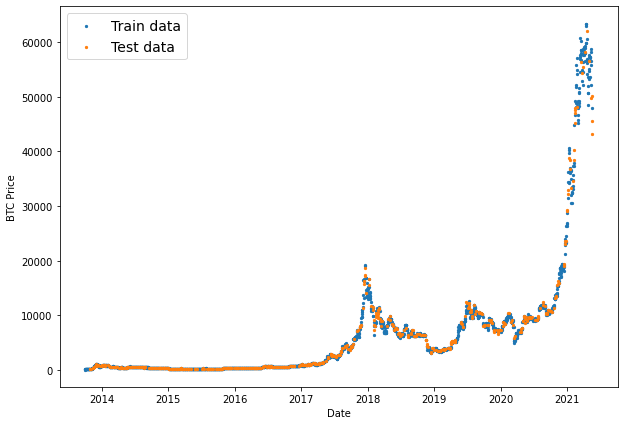

In [12]:
# Plotting the wrong data split results
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

In [13]:
# Right way to create train / test split for time series data
split_size = int(0.8 * len(prices)) # 80% - train, 20% - test

X_train, y_train = timestamps[:split_size], prices[:split_size]
X_test, y_test = timestamps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2229, 558, 2229, 558)

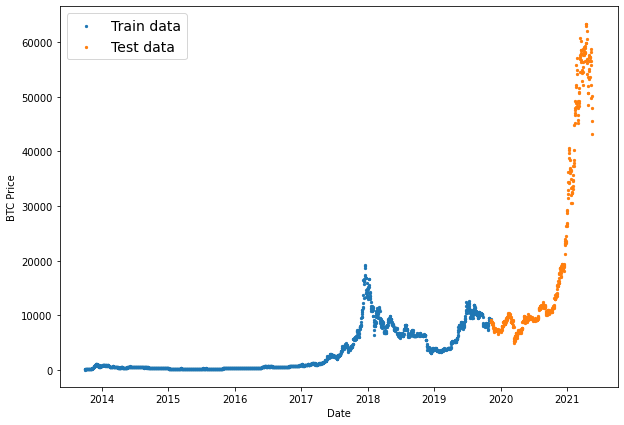

In [14]:
# Plotting the right data split results
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

In [15]:
# Creating plotting function
def plot_time_series(timestamps, values, marker=",", start=0, end=None, label=None):
    plt.plot(timestamps[start:end], values[start:end], marker=marker, label=label)
    plt.xlabel("Time")
    plt.ylabel("BTC Price")
    if label:
        plt.legend(fontsize=14)
    plt.grid(True)

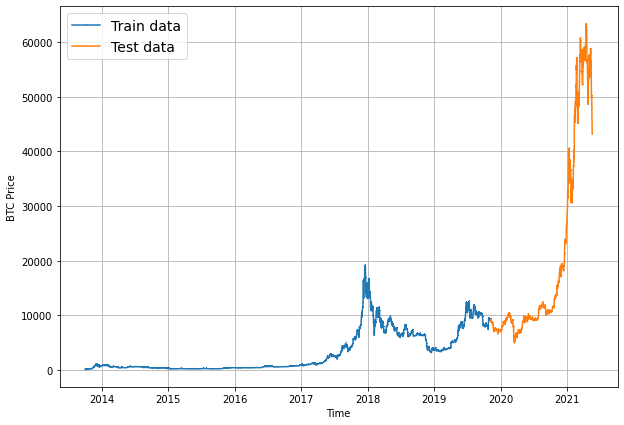

In [16]:
# Testing plot function
plt.figure(figsize=(10, 7))
plot_time_series(timestamps=X_train, values=y_train, label="Train data")
plot_time_series(timestamps=X_test, values=y_test, label="Test data")

### Model 0 - Naive forecast (baseline)

The prediction at timestamp t(y-hat) is equal to the value at timestamp t-1 (previous timestamp), i.e horizon of 1.
$$\hat{y}_{t} = y_{t-1}$$

In [17]:
# Creating naive forecast
naive_forecast = y_test[:-1]

print(f"First 10 values: {naive_forecast[:10]}\n")
print(f"Last 10 values: {naive_forecast[-10:]}")

First 10 values: [9226.48582088 8794.35864452 8798.04205463 9081.18687849 8711.53433917
 8760.89271814 8749.52059102 8656.97092235 8500.64355816 8469.2608989 ]

Last 10 values: [57107.12067189 58788.20967893 58102.19142623 55715.54665129
 56573.5554719  52147.82118698 49764.1320816  50032.69313676
 47885.62525472 45604.61575361]


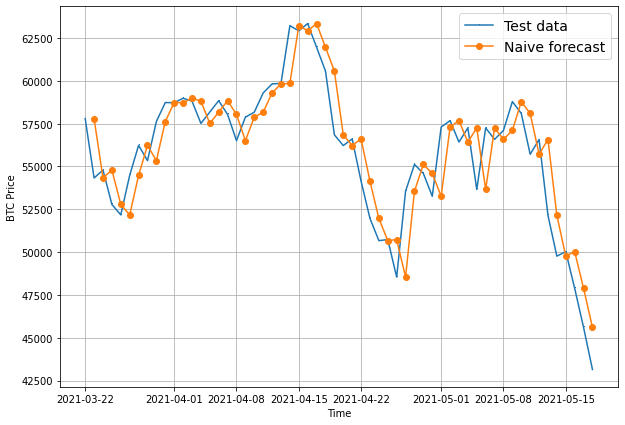

In [18]:
# Plotting naive forecast
plt.figure(figsize=(10, 7))
# plot_time_series(timestamps=X_train, values=y_train, label="Train data")
plot_time_series(timestamps=X_test, values=y_test, start=500, label="Test data")
plot_time_series(timestamps=X_test[1:], values=naive_forecast, start=500, marker="o", label="Naive forecast")

In [19]:
# MASE implementation
def mean_absolute_scaled_error(y_true, y_pred):
    mae = tf.reduce_mean(tf.abs(y_true - y_pred))

    # Find MAE of Naive Forecast (no seasonality)
    mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # Seasonality of 1 day

    return mae / mae_naive_no_season

In [20]:
# Verify if MASE of Naive Forecast is 1
mean_absolute_scaled_error(
    y_true=y_test[1:],
    y_pred=naive_forecast
)

<tf.Tensor: shape=(), dtype=float64, numpy=0.9995699939182626>

In [21]:
# Function for evaluation matrix
def evaluate_preds(y_true, y_pred):

    # Ensuring that we use float32 dtype (for metric calculations)
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)

    # Calculating various evaluation metrics
    mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
    mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
    rmse = tf.sqrt(mse)
    mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
    mase = mean_absolute_scaled_error(y_true, y_pred)

    return {
        "mae": mae.numpy(),
        "mse": mse.numpy(),
        "rmse": rmse.numpy(),
        "mape": mape.numpy(),
        "mase": mase.numpy()
    }

In [22]:
# Evaluating naive forecast results
naive_results = evaluate_preds(y_true=y_test[1:], y_pred=naive_forecast)
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.5165248,
 'mase': 0.99957}

### Windowing data

In [23]:
# We want to use Bitcoin prices of the week to predict next day price
print(f"Intention is to use {btc_price[:7]} to predict {btc_price[7]}")

Intention is to use [123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795] to predict 123.033


In [24]:
# Setting up global variables for window size and horizon
HORIZON = 1 # predict next 1 day
WINDOW_SIZE = 7 # use the past week of Bitcoin data

In [25]:
# Creating function to label windowed data
def get_labelled_window(x, horizon=HORIZON):
    return x[:, :-horizon], x[:, -horizon:]

In [26]:
# Testing window labelling function
test_window, test_label = get_labelled_window(tf.expand_dims(tf.range(8) + 1, axis=0))
test_window, test_label

(<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]])>,
 <tf.Tensor: shape=(1, 1), dtype=int32, numpy=array([[8]])>)

In [27]:
# Creating function to view NumPy arrays as windows
def make_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON):

    # 1. Creating window of specific window size
    window_step = np.expand_dims(np.arange(window_size + horizon), axis=0)

    # 2. Creating 2D array of multiple windows
    window_indexes = window_step + np.expand_dims(np.arange(len(x) - (window_size + horizon - 1)), axis=0).T
    # print(f"Windows indexes: {window_indexes} with shape of {window_indexes.shape}")

    # 3. Index on the target array (time series) with 2D of multiple window steps
    windowed_array = x[window_indexes]

    # 4. Get the labelled windows
    windows, labels = get_labelled_window(windowed_array, horizon=horizon)
    return windows, labels

In [28]:
# Testing the function
full_windows, full_labels = make_windows(prices)
len(full_windows), len(full_labels)

(2780, 2780)

In [29]:
# Viewing the first 3 windows / labels
for i in range(3):
    print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label: [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label: [125.96116]


In [30]:
# Viewing the last 3 windows / labels
for i in range(3):
    print(f"Window: {full_windows[i-3]} -> Label: {full_labels[i-3]}")

Window: [58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676] -> Label: [47885.62525472]
Window: [58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472] -> Label: [45604.61575361]
Window: [55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361] -> Label: [43144.47129086]


### Splitting windows into training and testing sets

In [31]:
# Creating function to make train / test splits
def make_train_test_splits(windows, labels, test_split=0.2):
    split_size = int(len(windows) * (1 - test_split)) # Default 80% train / 20% test
    train_windows = windows[:split_size]
    train_labels = labels[:split_size]
    test_windows = windows[split_size:]
    test_labels = labels[split_size:]
    return train_windows, test_windows, train_labels, test_labels

In [32]:
# Creating training and testing windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(
    full_windows, full_labels
)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [33]:
# Checking the first 5 train window values
train_windows[:5], train_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]),
 array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [34]:
# Checking the first test values
test_windows[:5], test_labels[:5]

(array([[9290.89660239, 9202.41545055, 9369.62808116, 9326.59962378,
         9335.75240233, 9226.48582088, 8794.35864452],
        [9202.41545055, 9369.62808116, 9326.59962378, 9335.75240233,
         9226.48582088, 8794.35864452, 8798.04205463],
        [9369.62808116, 9326.59962378, 9335.75240233, 9226.48582088,
         8794.35864452, 8798.04205463, 9081.18687849],
        [9326.59962378, 9335.75240233, 9226.48582088, 8794.35864452,
         8798.04205463, 9081.18687849, 8711.53433917],
        [9335.75240233, 9226.48582088, 8794.35864452, 8798.04205463,
         9081.18687849, 8711.53433917, 8760.89271814]]),
 array([[8798.04205463],
        [9081.18687849],
        [8711.53433917],
        [8760.89271814],
        [8749.52059102]]))

### Modelling checkpoint callback

In [35]:
# Function to implement ModelCheckpoint callback
import os

def create_model_checkpoint(model_name, save_path="model_experiments"):
    return tf.keras.callbacks.ModelCheckpoint(
        filepath=os.path.join(save_path, model_name),
        verbose=0,
        save_best_only=True
    )

### Model 1 - Dense model (window = 7, horizon = 1)

In [36]:
# Loading libraries
import tensorflow as tf
from tensorflow.keras import layers

# Setting random seed
tf.random.set_seed(42)

# Constructing a model
model_1 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON, activation="linear")
], name="model_1_dense")

# Compiling the model
model_1.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae", "mse"]
)

# Fitting the model
history_1 = model_1.fit(
    x=train_windows,
    y=train_labels,
    epochs=100,
    verbose=1,
    batch_size=128,
    validation_data=(test_windows, test_labels),
    callbacks=[create_model_checkpoint(model_name=model_1.name)]
)

Epoch 1/100
18/18 [==============================] - 3s 108ms/step - loss: 1543.6925 - mae: 1543.6925 - mse: 7901906.0000 - val_loss: 1668.6884 - val_mae: 1668.6884 - val_mse: 7701670.5000
Epoch 2/100
18/18 [==============================] - 0s 7ms/step - loss: 364.4254 - mae: 364.4254 - mse: 508979.9062 - val_loss: 1882.7103 - val_mae: 1882.7103 - val_mse: 8306344.5000
Epoch 3/100
18/18 [==============================] - 1s 55ms/step - loss: 222.0416 - mae: 222.0416 - mse: 239176.1562 - val_loss: 1141.0499 - val_mae: 1141.0499 - val_mse: 3814509.5000
Epoch 4/100
18/18 [==============================] - 1s 74ms/step - loss: 186.2869 - mae: 186.2869 - mse: 176115.7656 - val_loss: 1003.3169 - val_mae: 1003.3169 - val_mse: 3275740.7500
Epoch 5/100
18/18 [==============================] - 1s 66ms/step - loss: 177.4913 - mae: 177.4913 - mse: 167362.9219 - val_loss: 937.1996 - val_mae: 937.1996 - val_mse: 2858952.5000
Epoch 6/100
18/18 [==============================] - 1s 59ms/step - loss: 

In [37]:
# Evaluating the model on test data
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 615.6467 - mae: 615.6467 - mse: 1247313.1250


[615.6466674804688, 615.6466674804688, 1247313.125]

In [38]:
# Loading the best performing model_1 run and evaluating on test data
model_1_best = tf.keras.models.load_model("model_experiments/model_1_dense/")
model_1_best.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 561.0565 - mae: 561.0565 - mse: 1143680.0000


[561.0565185546875, 561.0565185546875, 1143680.0]

In [39]:
# Creating function to make predictions
def make_preds(model, input_data):
    forecast = model.predict(input_data)
    return tf.squeeze(forecast) # 1D array of predictions

In [40]:
# Making predictions with the model 1
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

18/18 [==============================] - 0s 2ms/step


(556,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8725.503, 8663.989, 8906.555, 8673.503, 8653.85 , 8606.402,
        8565.505, 8421.213, 8343.846, 8415.38 ], dtype=float32)>)

In [41]:
# Evaluting model 1 predictions
model_1_results = evaluate_preds(
    y_true=tf.squeeze(test_labels),
    y_pred=model_1_preds
)
model_1_results

{'mae': 615.6467,
 'mse': 1247313.1,
 'rmse': 1116.8318,
 'mape': 2.7973807,
 'mase': 1.0815208}

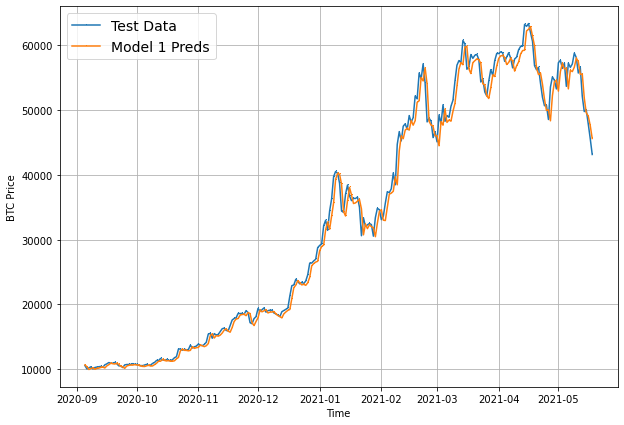

In [42]:
# Plotting model results
offset = 300
plt.figure(figsize=(10, 7))

plot_time_series(
    timestamps=X_test[-len(test_windows):],
    values=test_labels[:, ],
    start=offset,
    label="Test Data"
)

plot_time_series(
    timestamps=X_test[-len(test_windows):],
    values=model_1_preds,
    start=offset,
    label="Model 1 Preds"
)

### Model 2 - Dense model (window = 30, horizon = 1)

In [43]:
# Hyperparameters
HORIZON = 1
WINDOW_SIZE = 30

In [44]:
# Making windows data
full_windows, full_labels = make_windows(
    prices,
    window_size=WINDOW_SIZE,
    horizon=HORIZON
)
len(full_windows), len(full_labels)

(2757, 2757)

In [45]:
# Making train and test windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(
    windows=full_windows,
    labels=full_labels,
    test_split=0.2
)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2205, 552, 2205, 552)

In [46]:
# Checking first 3 train windows
train_windows[:3]

array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ,
        126.38333, 135.24199, 133.20333, 142.76333, 137.92333, 142.95166,
        152.55183, 160.33883, 164.31499, 177.63333, 188.29716, 200.70166,
        180.355  , 175.03166, 177.6965 , 187.15983, 192.75666, 197.4    ],
       [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
        123.033  , 124.049  , 125.96116, 125.27966, 125.9275 , 126.38333,
        135.24199, 133.20333, 142.76333, 137.92333, 142.95166, 152.55183,
        160.33883, 164.31499, 177.63333, 188.29716, 200.70166, 180.355  ,
        175.03166, 177.6965 , 187.15983, 192.75666, 197.4    , 196.02499],
       [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
        124.049  , 125.96116, 125.27966, 125.9275 , 126.38333, 135.24199,
        133.20333, 142.76333, 137.92333, 142.95166, 152.55183, 160.33883,
        164.31499, 177.63333, 188.29

In [47]:
# Creating a model
model_2 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON)
], name="model_2_dense")

# Compiling the model
model_2.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae"]
)

# Fitting the model
history_2 = model_2.fit(
    train_windows,
    train_labels,
    epochs=100,
    batch_size=128,
    verbose=0,
    validation_data=(test_windows, test_labels),
    callbacks=[create_model_checkpoint(model_name=model_2.name)]
)

INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: mod

In [48]:
# Evaluating model 2
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 649.1481 - mae: 649.1481


[649.1480712890625, 649.1480712890625]

In [49]:
# Loading the best model 2
model_2_best = tf.keras.models.load_model("model_experiments/model_2_dense/")
model_2_best.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 624.1382 - mae: 624.1382


[624.1382446289062, 624.1382446289062]

In [50]:
# getting model 2 predictions
model_2_preds = make_preds(
    model_2,
    input_data=test_windows
)

18/18 [==============================] - 0s 1ms/step


In [51]:
# Evaluating results
model_2_results = evaluate_preds(
    y_true=tf.squeeze(test_labels),
    y_pred=model_2_preds
)
model_2_results

{'mae': 649.148,
 'mse': 1377770.8,
 'rmse': 1173.7848,
 'mape': 2.9522805,
 'mase': 1.1347171}

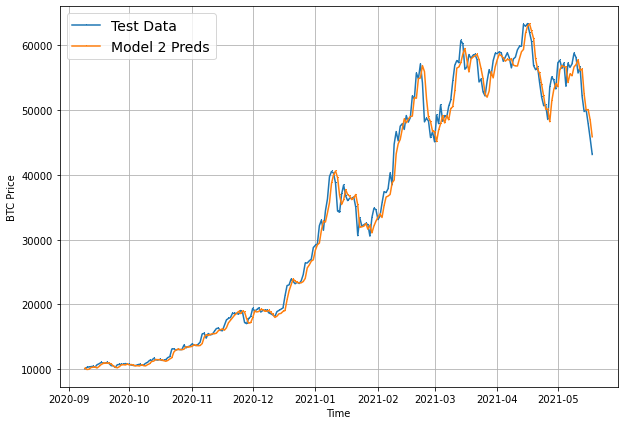

In [52]:
# Visualising model 2 results
offset = 300
plt.figure(figsize=(10, 7))

plot_time_series(
    timestamps=X_test[-len(test_windows):],
    values=test_labels[:, 0],
    start=offset,
    label="Test Data"
)

plot_time_series(
    timestamps=X_test[-len(test_windows):],
    values=model_2_preds,
    start=offset,
    label="Model 2 Preds"
)

### Model 3 - Dense model (window = 30, horizon = 7)

In [53]:
# Hyperparameters
HORIZON = 7
WINDOW_SIZE = 30

In [54]:
# Making windows data
full_windows, full_labels = make_windows(
    prices,
    window_size=WINDOW_SIZE,
    horizon=HORIZON
)
len(full_windows), len(full_labels)

(2751, 2751)

In [55]:
# Making train and test windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(
    windows=full_windows,
    labels=full_labels,
    test_split=0.2
)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2200, 551, 2200, 551)

In [56]:
# Creating a model
model_3 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON)
], name="model_3_dense")

# Compiling the model
model_3.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae"]
)

# Fitting the model
history_3 = model_3.fit(
    train_windows,
    train_labels,
    epochs=100,
    batch_size=128,
    verbose=0,
    validation_data=(test_windows, test_labels),
    callbacks=[create_model_checkpoint(model_name=model_3.name)]
)

INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: mod

In [57]:
# Evaluating model 3
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1360.7954 - mae: 1360.7954


[1360.79541015625, 1360.79541015625]

In [58]:
# Making predictions with model 3
model_3_preds = make_preds(
    model_3,
    input_data=test_windows
)
model_3_preds[:3]

18/18 [==============================] - 0s 3ms/step


<tf.Tensor: shape=(3, 7), dtype=float32, numpy=
array([[9231.858, 9279.451, 9467.592, 9010.591, 9093.543, 8779.799,
        8938.377],
       [8860.687, 8950.581, 9251.076, 8894.009, 8849.229, 8696.604,
        8779.649],
       [8573.125, 8869.231, 8995.994, 8781.648, 8749.147, 8604.346,
        8836.576]], dtype=float32)>

In [59]:
# Evaluating model 3 preds
model_3_results = evaluate_preds(
    y_true=tf.squeeze(test_labels),
    y_pred=model_3_preds
)
model_3_results

{'mae': array([ 321.2437  ,  183.46498 ,  213.74037 ,  249.00139 ,  185.02707 ,
         260.31216 ,  281.72293 ,  247.35178 ,  249.91483 ,  371.6861  ,
         550.36487 ,  548.51337 ,  600.30225 ,  604.3625  ,  343.9924  ,
         252.00928 ,  353.8228  ,  509.72293 ,  493.58344 ,  573.4366  ,
         184.72803 ,  254.27455 ,  185.36063 ,  243.67961 ,  207.87584 ,
         261.1263  ,  229.60275 ,  331.1852  ,  234.51326 ,  199.39168 ,
         170.24086 ,  157.6716  ,  163.43039 ,  177.79213 ,  197.72453 ,
         277.81284 ,  272.66595 ,  267.74603 ,  293.66895 ,  369.77512 ,
         673.65497 ,  203.51863 ,  316.2256  ,  209.14795 ,  154.90639 ,
         161.23723 ,  209.61922 ,  144.94035 ,  132.6298  ,  114.924385,
         227.95201 ,  188.44922 ,  215.13902 ,  267.98373 ,  384.81696 ,
         448.19733 ,  680.1561  ,  738.22375 ,  633.421   ,  741.4393  ,
         573.7372  ,  398.535   ,  376.68442 ,  589.73944 ,  575.98004 ,
         635.0739  ,  674.39984 ,  745.7807 

In [60]:
# Function for evaluation matrix
# MAKING IT WORK FOR HIGHER HORIZON
def evaluate_preds(y_true, y_pred):

    # Ensuring that we use float32 dtype (for metric calculations)
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)

    # Calculating various evaluation metrics
    mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
    mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
    rmse = tf.sqrt(mse)
    mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
    mase = mean_absolute_scaled_error(y_true, y_pred)

    # Account for different size metrics
    if mae.ndim > 0:
        mae = tf.reduce_mean(mae)
        mse = tf.reduce_mean(mse)
        rmse = tf.reduce_mean(rmse)
        mape = tf.reduce_mean(mape)
        mase = tf.reduce_mean(mase)

    return {
        "mae": mae.numpy(),
        "mse": mse.numpy(),
        "rmse": rmse.numpy(),
        "mape": mape.numpy(),
        "mase": mase.numpy()
    }

In [61]:
# Re-evaluating model 3 preds
model_3_results = evaluate_preds(
    y_true=tf.squeeze(test_labels),
    y_pred=model_3_preds
)
model_3_results

{'mae': 1360.7955,
 'mse': 5980540.0,
 'rmse': 1564.8152,
 'mape': 6.064479,
 'mase': 2.421459}

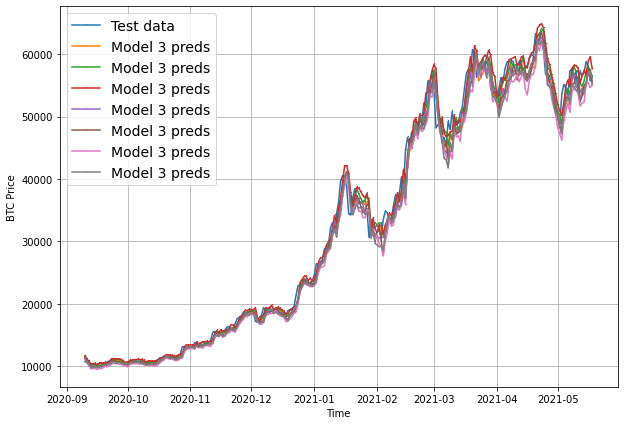

In [62]:
# Visualising the data
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(
    timestamps=X_test[-len(test_windows):],
    values=test_labels[:, 0],
    start=offset,
    label="Test data"
)
plot_time_series(
    timestamps=X_test[-len(test_windows):],
    values=model_3_preds,
    start=offset,
    label="Model 3 preds"
)

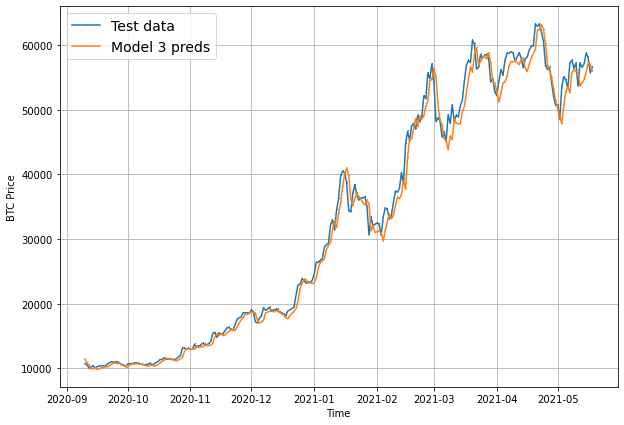

In [63]:
# Visualising the data
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(
    timestamps=X_test[-len(test_windows):],
    values=test_labels[:, 0],
    start=offset,
    label="Test data"
)
plot_time_series(
    timestamps=X_test[-len(test_windows):],
    values=tf.reduce_mean(model_3_preds, axis=1),
    start=offset,
    label="Model 3 preds"
)

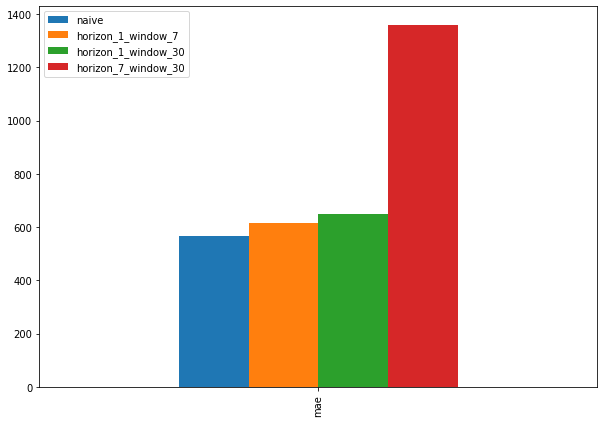

In [64]:
# Comparing models performance
pd.DataFrame({
    "naive": naive_results["mae"],
    "horizon_1_window_7": model_1_results["mae"],
    "horizon_1_window_30": model_2_results["mae"],
    "horizon_7_window_30": model_3_results["mae"]
}, index=["mae"]).plot(figsize=(10, 7), kind="bar");

### Model 4 - Using Conv1D

In [65]:
# Defining horizon and window
HORIZON = 1
WINDOW_SIZE = 7

In [66]:
# Creating windowed data
full_windows,full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [67]:
# Creating train / test datasets
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(train_labels), len(test_windows), len(test_labels)

(2224, 2224, 556, 556)

In [68]:
# Checking data input shape
train_windows[0].shape # returns WINDOW_SIZE

(7,)

In [69]:
# Conv1D expects input of (batch_size, timestamps, input_dim)

In [70]:
# Reshaping the tensor
x = tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [71]:
# Creating Lambda layer
expand_dim_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))

In [72]:
# Testing Lambda layer
print(f"Original shape: {x.shape}") # Output WINDOW_SIZE
print(f"Expanded shape: {expand_dim_layer(x).shape}")
print(f"Original values with expanded shape:\n {expand_dim_layer(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


In [73]:
# Creating Conv1D model
model_4 = tf.keras.Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
    layers.Conv1D(filters=128, kernel_size=5, strides=1, padding="causal", activation="relu"),
    layers.Dense(HORIZON)
], name="model_4_Conv1D")

# Compiling the model
model_4.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.Adam()
)

# Fitting the model
history_4 = model_4.fit(
    train_windows,
    train_labels,
    batch_size=128,
    epochs=100,
    validation_data=(test_windows, test_labels),
    callbacks=[create_model_checkpoint(model_name=model_4.name)]
)

Epoch 1/100
 1/18 [>.............................] - ETA: 12s - loss: 2771.6445

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 2s 89ms/step - loss: 1178.2152 - val_loss: 1991.5481
Epoch 2/100
12/18 [===================>..........] - ETA: 0s - loss: 354.9310

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 74ms/step - loss: 313.6219 - val_loss: 1692.5896
Epoch 3/100
 1/18 [>.............................] - ETA: 0s - loss: 227.9884

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 75ms/step - loss: 205.0596 - val_loss: 1193.5153
Epoch 4/100
18/18 [==============================] - ETA: 0s - loss: 183.4073

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 85ms/step - loss: 183.4073 - val_loss: 1007.0234
Epoch 5/100
13/18 [====================>.........] - ETA: 0s - loss: 184.0907

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 2s 97ms/step - loss: 177.1845 - val_loss: 1004.0944
Epoch 6/100
13/18 [====================>.........] - ETA: 0s - loss: 167.9476

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 2s 88ms/step - loss: 172.3621 - val_loss: 968.7689
Epoch 7/100
 1/18 [>.............................] - ETA: 0s - loss: 208.9193

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 78ms/step - loss: 170.0049 - val_loss: 937.9866
Epoch 8/100
 1/18 [>.............................] - ETA: 0s - loss: 142.0135

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 70ms/step - loss: 165.5789 - val_loss: 934.9073
Epoch 9/100
18/18 [==============================] - 0s 6ms/step - loss: 163.7861 - val_loss: 936.4553
Epoch 10/100
18/18 [==============================] - ETA: 0s - loss: 160.7096

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 2s 95ms/step - loss: 160.7096 - val_loss: 895.5486
Epoch 11/100
 1/18 [>.............................] - ETA: 0s - loss: 177.0414

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 73ms/step - loss: 157.5915 - val_loss: 874.7244
Epoch 12/100
18/18 [==============================] - 0s 6ms/step - loss: 154.7145 - val_loss: 945.1862
Epoch 13/100
 1/18 [>.............................] - ETA: 0s - loss: 124.0570

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 76ms/step - loss: 153.5089 - val_loss: 861.7025
Epoch 14/100
18/18 [==============================] - 0s 8ms/step - loss: 148.7548 - val_loss: 862.9082
Epoch 15/100
18/18 [==============================] - 0s 6ms/step - loss: 148.5480 - val_loss: 874.9801
Epoch 16/100
 1/18 [>.............................] - ETA: 0s - loss: 137.9207

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 78ms/step - loss: 145.2280 - val_loss: 814.6552
Epoch 17/100
 1/18 [>.............................] - ETA: 0s - loss: 137.0730

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 82ms/step - loss: 143.9527 - val_loss: 788.2871
Epoch 18/100
18/18 [==============================] - 0s 7ms/step - loss: 139.1852 - val_loss: 798.4861
Epoch 19/100
18/18 [==============================] - 0s 7ms/step - loss: 136.4507 - val_loss: 797.5266
Epoch 20/100
12/18 [===================>..........] - ETA: 0s - loss: 138.9435

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 76ms/step - loss: 136.8467 - val_loss: 760.1083
Epoch 21/100
 1/18 [>.............................] - ETA: 0s - loss: 180.1373

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 72ms/step - loss: 136.2941 - val_loss: 737.3062
Epoch 22/100
15/18 [========================>.....] - ETA: 0s - loss: 138.4815

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 78ms/step - loss: 133.6974 - val_loss: 723.0918
Epoch 23/100
18/18 [==============================] - ETA: 0s - loss: 129.6165

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 74ms/step - loss: 129.6165 - val_loss: 714.1617
Epoch 24/100
18/18 [==============================] - ETA: 0s - loss: 128.9430

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 66ms/step - loss: 128.9430 - val_loss: 704.9727
Epoch 25/100
 8/18 [============>.................] - ETA: 0s - loss: 132.5195

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 2s 94ms/step - loss: 126.5776 - val_loss: 700.1186
Epoch 26/100
18/18 [==============================] - 0s 5ms/step - loss: 129.7195 - val_loss: 718.0587
Epoch 27/100
17/18 [===========================>..] - ETA: 0s - loss: 126.9676

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 64ms/step - loss: 127.4281 - val_loss: 681.0319
Epoch 28/100
18/18 [==============================] - 0s 6ms/step - loss: 122.4323 - val_loss: 681.2309
Epoch 29/100
16/18 [=========================>....] - ETA: 0s - loss: 120.6669

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 75ms/step - loss: 121.4970 - val_loss: 673.5140
Epoch 30/100
18/18 [==============================] - 0s 5ms/step - loss: 125.1623 - val_loss: 675.2536
Epoch 31/100
18/18 [==============================] - 0s 5ms/step - loss: 123.0276 - val_loss: 729.2153
Epoch 32/100
18/18 [==============================] - 0s 5ms/step - loss: 124.1330 - val_loss: 689.5863
Epoch 33/100
17/18 [===========================>..] - ETA: 0s - loss: 120.1199

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 66ms/step - loss: 119.2504 - val_loss: 665.5843
Epoch 34/100
18/18 [==============================] - ETA: 0s - loss: 118.8929

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 68ms/step - loss: 118.8929 - val_loss: 651.5877
Epoch 35/100
 1/18 [>.............................] - ETA: 0s - loss: 104.2958

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 75ms/step - loss: 118.1698 - val_loss: 634.9402
Epoch 36/100
18/18 [==============================] - 0s 9ms/step - loss: 122.6085 - val_loss: 714.5899
Epoch 37/100
 1/18 [>.............................] - ETA: 0s - loss: 157.6840

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 78ms/step - loss: 120.2142 - val_loss: 625.0025
Epoch 38/100
 1/18 [>.............................] - ETA: 0s - loss: 108.4536

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 74ms/step - loss: 117.3621 - val_loss: 623.7975
Epoch 39/100
15/18 [========================>.....] - ETA: 0s - loss: 120.2443

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 73ms/step - loss: 116.3104 - val_loss: 618.7695
Epoch 40/100
 1/18 [>.............................] - ETA: 0s - loss: 107.8471

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 70ms/step - loss: 114.7070 - val_loss: 615.0454
Epoch 41/100
 1/18 [>.............................] - ETA: 0s - loss: 108.5547

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 73ms/step - loss: 114.3892 - val_loss: 612.2292
Epoch 42/100
18/18 [==============================] - 0s 6ms/step - loss: 118.9642 - val_loss: 622.2933
Epoch 43/100
18/18 [==============================] - 0s 4ms/step - loss: 114.7144 - val_loss: 642.7216
Epoch 44/100
18/18 [==============================] - 0s 5ms/step - loss: 115.5077 - val_loss: 627.2785
Epoch 45/100
18/18 [==============================] - 0s 5ms/step - loss: 117.3296 - val_loss: 632.8093
Epoch 46/100
18/18 [==============================] - 0s 5ms/step - loss: 115.1973 - val_loss: 615.0797
Epoch 47/100
18/18 [==============================] - 0s 6ms/step - loss: 113.0239 - val_loss: 667.3893
Epoch 48/100
18/18 [==============================] - 0s 6ms/step - loss: 112.6385 - val_loss: 622.2720
Epoch 49/100
 1/18 [>.............................] - ETA: 0s - loss: 159.5352

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 2s 96ms/step - loss: 114.8335 - val_loss: 596.7827
Epoch 50/100
18/18 [==============================] - 0s 5ms/step - loss: 113.0428 - val_loss: 599.7328
Epoch 51/100
18/18 [==============================] - 0s 4ms/step - loss: 112.6380 - val_loss: 626.0257
Epoch 52/100
 1/18 [>.............................] - ETA: 0s - loss: 124.8318

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 71ms/step - loss: 118.3171 - val_loss: 592.6545
Epoch 53/100
18/18 [==============================] - 0s 6ms/step - loss: 115.7682 - val_loss: 606.8443
Epoch 54/100
18/18 [==============================] - 0s 6ms/step - loss: 114.8964 - val_loss: 641.2996
Epoch 55/100
 1/18 [>.............................] - ETA: 0s - loss: 138.0588

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 62ms/step - loss: 112.2598 - val_loss: 591.0049
Epoch 56/100
18/18 [==============================] - 0s 6ms/step - loss: 110.1845 - val_loss: 718.3746
Epoch 57/100
18/18 [==============================] - 0s 5ms/step - loss: 120.8524 - val_loss: 678.0277
Epoch 58/100
 1/18 [>.............................] - ETA: 0s - loss: 98.0254

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 63ms/step - loss: 117.5692 - val_loss: 587.4301
Epoch 59/100
 1/18 [>.............................] - ETA: 0s - loss: 85.0826

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 76ms/step - loss: 112.3823 - val_loss: 586.5067
Epoch 60/100
18/18 [==============================] - 0s 6ms/step - loss: 109.5803 - val_loss: 610.3244
Epoch 61/100
18/18 [==============================] - 0s 6ms/step - loss: 110.8585 - val_loss: 590.1013
Epoch 62/100
18/18 [==============================] - 0s 7ms/step - loss: 109.6899 - val_loss: 596.0419
Epoch 63/100
18/18 [==============================] - 0s 7ms/step - loss: 113.4481 - val_loss: 592.6564
Epoch 64/100
18/18 [==============================] - 0s 6ms/step - loss: 111.3467 - val_loss: 648.8536
Epoch 65/100
18/18 [==============================] - 0s 6ms/step - loss: 113.2099 - val_loss: 591.4364
Epoch 66/100
 1/18 [>.............................] - ETA: 0s - loss: 116.2395

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 69ms/step - loss: 110.2806 - val_loss: 580.5883
Epoch 67/100
18/18 [==============================] - 0s 7ms/step - loss: 108.4239 - val_loss: 644.8674
Epoch 68/100
18/18 [==============================] - 0s 8ms/step - loss: 118.7640 - val_loss: 727.3658
Epoch 69/100
18/18 [==============================] - 0s 6ms/step - loss: 128.2924 - val_loss: 724.4535
Epoch 70/100
 1/18 [>.............................] - ETA: 0s - loss: 139.9466

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 79ms/step - loss: 120.3659 - val_loss: 579.3591
Epoch 71/100
18/18 [==============================] - 0s 5ms/step - loss: 111.9538 - val_loss: 606.8204
Epoch 72/100
18/18 [==============================] - 0s 6ms/step - loss: 109.5861 - val_loss: 581.4498
Epoch 73/100
18/18 [==============================] - 0s 6ms/step - loss: 111.5653 - val_loss: 604.1492
Epoch 74/100
 1/18 [>.............................] - ETA: 0s - loss: 165.3531

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 63ms/step - loss: 108.6028 - val_loss: 578.9691
Epoch 75/100
18/18 [==============================] - 0s 6ms/step - loss: 110.7208 - val_loss: 617.8850
Epoch 76/100
18/18 [==============================] - 0s 6ms/step - loss: 112.8243 - val_loss: 580.4754
Epoch 77/100
17/18 [===========================>..] - ETA: 0s - loss: 111.1907

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 79ms/step - loss: 110.3784 - val_loss: 576.7784
Epoch 78/100
 1/18 [>.............................] - ETA: 0s - loss: 111.3251

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 2s 95ms/step - loss: 109.3156 - val_loss: 575.7208
Epoch 79/100
18/18 [==============================] - 0s 5ms/step - loss: 108.4955 - val_loss: 609.1289
Epoch 80/100
18/18 [==============================] - 0s 5ms/step - loss: 109.3981 - val_loss: 590.7675
Epoch 81/100
18/18 [==============================] - 0s 6ms/step - loss: 108.3527 - val_loss: 578.0142
Epoch 82/100
18/18 [==============================] - 0s 5ms/step - loss: 118.0228 - val_loss: 614.9916
Epoch 83/100
18/18 [==============================] - 0s 6ms/step - loss: 111.7754 - val_loss: 585.4472
Epoch 84/100
 1/18 [>.............................] - ETA: 0s - loss: 110.8355

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 74ms/step - loss: 109.5556 - val_loss: 573.9724
Epoch 85/100
18/18 [==============================] - 0s 5ms/step - loss: 107.2307 - val_loss: 596.3902
Epoch 86/100
18/18 [==============================] - 0s 5ms/step - loss: 111.9538 - val_loss: 657.6013
Epoch 87/100
18/18 [==============================] - 0s 5ms/step - loss: 108.9247 - val_loss: 582.8103
Epoch 88/100
18/18 [==============================] - 0s 6ms/step - loss: 107.9960 - val_loss: 576.9178
Epoch 89/100
18/18 [==============================] - 0s 7ms/step - loss: 110.8077 - val_loss: 583.3591
Epoch 90/100
18/18 [==============================] - 0s 6ms/step - loss: 107.5166 - val_loss: 649.7975
Epoch 91/100
18/18 [==============================] - 0s 6ms/step - loss: 113.8105 - val_loss: 614.8296
Epoch 92/100
 1/18 [>.............................] - ETA: 0s - loss: 94.9001

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 76ms/step - loss: 109.4453 - val_loss: 572.2163
Epoch 93/100
18/18 [==============================] - 0s 5ms/step - loss: 114.4949 - val_loss: 616.5641
Epoch 94/100
18/18 [==============================] - 0s 7ms/step - loss: 111.0832 - val_loss: 584.4518
Epoch 95/100
18/18 [==============================] - 0s 5ms/step - loss: 107.0493 - val_loss: 572.7836
Epoch 96/100
18/18 [==============================] - 0s 6ms/step - loss: 111.9340 - val_loss: 625.1423
Epoch 97/100
18/18 [==============================] - 0s 5ms/step - loss: 111.4333 - val_loss: 591.8528
Epoch 98/100
18/18 [==============================] - 0s 5ms/step - loss: 109.5547 - val_loss: 573.8270
Epoch 99/100
 1/18 [>.............................] - ETA: 0s - loss: 150.8336

INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_Conv1D\assets


18/18 [==============================] - 1s 70ms/step - loss: 108.2890 - val_loss: 571.2165
Epoch 100/100
18/18 [==============================] - 0s 4ms/step - loss: 112.1624 - val_loss: 629.5804


In [74]:
# Checking the model structure
model_4.summary()

Model: "model_4_Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [75]:
# Evaluating the model
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 629.5804


629.5803833007812

In [76]:
# Loading back the best performing model
model_4 = tf.keras.models.load_model("./model_experiments/model_4_Conv1D/")
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 571.2165


571.2164916992188

In [77]:
# Making predictions
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8879.158, 8789.521, 9011.699, 8765.579, 8753.904, 8748.215,
       8681.657, 8510.795, 8480.422, 8516.737], dtype=float32)>

In [78]:
# Evaluating predictions
model_4_results = evaluate_preds(
    y_true=tf.squeeze(test_labels),
    y_pred=model_4_preds
)
model_4_results

{'mae': 571.2165,
 'mse': 1174370.1,
 'rmse': 1083.6836,
 'mape': 2.5455275,
 'mase': 1.0034691}

### Model 5 - LSTM (RNN)

In [79]:
# Building LSTM model with the Functional API
inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
# x = layers.LSTM(128, return_sequences=True)(x)
x = layers.LSTM(128, activation="relu")(x)
# x = layers.Dense(32, activation="relu")(x)
outputs = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs=inputs, outputs=outputs, name="module_5_LSTM")

# Compiling the model
model_5.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.Adam()
)

# Fitting the model
history_5 = model_5.fit(
    train_windows,
    train_labels,
    epochs=100,
    verbose=1,
    batch_size=128,
    validation_data=(test_windows, test_labels),
    callbacks=[create_model_checkpoint(model_name=model_5.name)]
)

Epoch 1/100
18/18 [==============================] - ETA: 0s - loss: 2695.8389INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 7s 262ms/step - loss: 2695.8389 - val_loss: 13191.1396
Epoch 2/100
18/18 [==============================] - ETA: 0s - loss: 1657.1515INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 4s 226ms/step - loss: 1657.1515 - val_loss: 7230.3740
Epoch 3/100
18/18 [==============================] - ETA: 0s - loss: 621.4913INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 4s 221ms/step - loss: 621.4913 - val_loss: 998.3973
Epoch 4/100
18/18 [==============================] - 0s 10ms/step - loss: 228.5957 - val_loss: 1031.3191
Epoch 5/100
10/18 [===============>..............] - ETA: 0s - loss: 198.0730INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 4s 222ms/step - loss: 185.3689 - val_loss: 991.2673
Epoch 6/100
18/18 [==============================] - 0s 10ms/step - loss: 181.4990 - val_loss: 1023.1882
Epoch 7/100
18/18 [==============================] - 0s 9ms/step - loss: 176.6915 - val_loss: 1010.7974
Epoch 8/100
18/18 [==============================] - 0s 12ms/step - loss: 175.2614 - val_loss: 1005.1655
Epoch 9/100
18/18 [==============================] - 0s 14ms/step - loss: 174.4778 - val_loss: 1001.2744
Epoch 10/100
15/18 [========================>.....] - ETA: 0s - loss: 169.3679INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 4s 254ms/step - loss: 173.7469 - val_loss: 986.3934
Epoch 11/100
18/18 [==============================] - 0s 11ms/step - loss: 173.6238 - val_loss: 999.6142
Epoch 12/100
18/18 [==============================] - 0s 10ms/step - loss: 172.1560 - val_loss: 999.6659
Epoch 13/100
10/18 [===============>..............] - ETA: 0s - loss: 165.4810INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 3s 193ms/step - loss: 171.0054 - val_loss: 981.1697
Epoch 14/100
18/18 [==============================] - 0s 14ms/step - loss: 170.2370 - val_loss: 998.2208
Epoch 15/100
16/18 [=========================>....] - ETA: 0s - loss: 172.0771INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 4s 210ms/step - loss: 169.3222 - val_loss: 980.5079
Epoch 16/100
16/18 [=========================>....] - ETA: 0s - loss: 165.6397INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 4s 220ms/step - loss: 167.8426 - val_loss: 939.6386
Epoch 17/100
18/18 [==============================] - 0s 10ms/step - loss: 167.0619 - val_loss: 1019.1985
Epoch 18/100
18/18 [==============================] - 0s 16ms/step - loss: 167.3851 - val_loss: 960.7158
Epoch 19/100
18/18 [==============================] - 0s 10ms/step - loss: 165.1859 - val_loss: 947.6339
Epoch 20/100
18/18 [==============================] - ETA: 0s - loss: 164.1524INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 4s 243ms/step - loss: 164.1524 - val_loss: 917.2620
Epoch 21/100
18/18 [==============================] - 0s 13ms/step - loss: 162.5660 - val_loss: 928.8912
Epoch 22/100
17/18 [===========================>..] - ETA: 0s - loss: 162.3818INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 4s 211ms/step - loss: 161.5192 - val_loss: 917.1273
Epoch 23/100
17/18 [===========================>..] - ETA: 0s - loss: 160.4920INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 3s 194ms/step - loss: 161.6827 - val_loss: 906.2166
Epoch 24/100
18/18 [==============================] - 0s 9ms/step - loss: 159.6539 - val_loss: 915.2310
Epoch 25/100
18/18 [==============================] - ETA: 0s - loss: 158.1588INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 4s 219ms/step - loss: 158.1588 - val_loss: 900.1793
Epoch 26/100
18/18 [==============================] - 0s 10ms/step - loss: 157.0737 - val_loss: 900.8646
Epoch 27/100
10/18 [===============>..............] - ETA: 0s - loss: 161.9889INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 4s 248ms/step - loss: 156.3738 - val_loss: 898.8474
Epoch 28/100
18/18 [==============================] - 0s 10ms/step - loss: 156.1517 - val_loss: 903.6223
Epoch 29/100
18/18 [==============================] - ETA: 0s - loss: 153.7217INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 4s 216ms/step - loss: 153.7217 - val_loss: 882.9180
Epoch 30/100
13/18 [====================>.........] - ETA: 0s - loss: 149.7395INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 4s 218ms/step - loss: 153.1956 - val_loss: 872.4301
Epoch 31/100
18/18 [==============================] - ETA: 0s - loss: 151.6664INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 3s 204ms/step - loss: 151.6664 - val_loss: 849.7158
Epoch 32/100
15/18 [========================>.....] - ETA: 0s - loss: 152.4411INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 4s 255ms/step - loss: 152.7964 - val_loss: 844.1932
Epoch 33/100
18/18 [==============================] - 0s 11ms/step - loss: 153.1064 - val_loss: 881.3074
Epoch 34/100
18/18 [==============================] - 0s 13ms/step - loss: 149.0034 - val_loss: 846.1453
Epoch 35/100
14/18 [======================>.......] - ETA: 0s - loss: 149.2953INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 3s 193ms/step - loss: 147.0903 - val_loss: 836.4964
Epoch 36/100
18/18 [==============================] - ETA: 0s - loss: 147.7150INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 3s 174ms/step - loss: 147.7150 - val_loss: 827.3631
Epoch 37/100
18/18 [==============================] - ETA: 0s - loss: 146.6877INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 4s 241ms/step - loss: 146.6877 - val_loss: 813.2939
Epoch 38/100
18/18 [==============================] - ETA: 0s - loss: 143.8351INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 4s 230ms/step - loss: 143.8351 - val_loss: 812.3832
Epoch 39/100
15/18 [========================>.....] - ETA: 0s - loss: 147.4588INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 3s 187ms/step - loss: 143.7569 - val_loss: 801.4655
Epoch 40/100
12/18 [===================>..........] - ETA: 0s - loss: 147.0955INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 3s 187ms/step - loss: 143.4538 - val_loss: 794.1718
Epoch 41/100
14/18 [======================>.......] - ETA: 0s - loss: 145.6936INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 79s 5s/step - loss: 141.2867 - val_loss: 790.4148
Epoch 42/100
18/18 [==============================] - 0s 22ms/step - loss: 140.4203 - val_loss: 790.5926
Epoch 43/100
18/18 [==============================] - 0s 16ms/step - loss: 139.3365 - val_loss: 804.7236
Epoch 44/100
15/18 [========================>.....] - ETA: 0s - loss: 138.5149INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 5s 299ms/step - loss: 137.3780 - val_loss: 771.0991
Epoch 45/100
18/18 [==============================] - 0s 16ms/step - loss: 173.2163 - val_loss: 938.5745
Epoch 46/100
18/18 [==============================] - 0s 24ms/step - loss: 145.0332 - val_loss: 782.6076
Epoch 47/100
18/18 [==============================] - 0s 19ms/step - loss: 137.0181 - val_loss: 786.8928
Epoch 48/100
15/18 [========================>.....] - ETA: 0s - loss: 136.6861INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 5s 269ms/step - loss: 135.2427 - val_loss: 770.1682
Epoch 49/100
14/18 [======================>.......] - ETA: 0s - loss: 133.8834INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 4s 219ms/step - loss: 134.5158 - val_loss: 739.0397
Epoch 50/100
14/18 [======================>.......] - ETA: 0s - loss: 130.4150INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 4s 264ms/step - loss: 133.9077 - val_loss: 734.3740
Epoch 51/100
18/18 [==============================] - 0s 16ms/step - loss: 134.5718 - val_loss: 742.6904
Epoch 52/100
18/18 [==============================] - 0s 15ms/step - loss: 134.4668 - val_loss: 770.0124
Epoch 53/100
18/18 [==============================] - 0s 17ms/step - loss: 133.2713 - val_loss: 744.1346
Epoch 54/100
18/18 [==============================] - 0s 18ms/step - loss: 131.9671 - val_loss: 740.9667
Epoch 55/100
18/18 [==============================] - ETA: 0s - loss: 130.4506INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 4s 247ms/step - loss: 130.4506 - val_loss: 717.3589
Epoch 56/100
18/18 [==============================] - 0s 17ms/step - loss: 129.9026 - val_loss: 719.0805
Epoch 57/100
16/18 [=========================>....] - ETA: 0s - loss: 130.8607INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 4s 227ms/step - loss: 128.9745 - val_loss: 706.0331
Epoch 58/100
15/18 [========================>.....] - ETA: 0s - loss: 127.7964INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 4s 250ms/step - loss: 127.0406 - val_loss: 700.8787
Epoch 59/100
18/18 [==============================] - 0s 20ms/step - loss: 125.8142 - val_loss: 703.4088
Epoch 60/100
18/18 [==============================] - 0s 18ms/step - loss: 125.6318 - val_loss: 726.5894
Epoch 61/100
18/18 [==============================] - 0s 17ms/step - loss: 125.4730 - val_loss: 703.5187
Epoch 62/100
14/18 [======================>.......] - ETA: 0s - loss: 125.9643INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 4s 260ms/step - loss: 126.5367 - val_loss: 690.6154
Epoch 63/100
18/18 [==============================] - ETA: 0s - loss: 124.5050INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 5s 313ms/step - loss: 124.5050 - val_loss: 682.0407
Epoch 64/100
18/18 [==============================] - 0s 27ms/step - loss: 124.1647 - val_loss: 688.6260
Epoch 65/100
17/18 [===========================>..] - ETA: 0s - loss: 124.2509INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 8s 495ms/step - loss: 122.9665 - val_loss: 679.3591
Epoch 66/100
18/18 [==============================] - 1s 34ms/step - loss: 122.0117 - val_loss: 689.5703
Epoch 67/100
16/18 [=========================>....] - ETA: 0s - loss: 118.9014INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 8s 488ms/step - loss: 121.9572 - val_loss: 666.1028
Epoch 68/100
15/18 [========================>.....] - ETA: 0s - loss: 124.1786INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 7s 422ms/step - loss: 122.3810 - val_loss: 662.4642
Epoch 69/100
15/18 [========================>.....] - ETA: 0s - loss: 124.5816INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 8s 445ms/step - loss: 124.0838 - val_loss: 659.2880
Epoch 70/100
16/18 [=========================>....] - ETA: 0s - loss: 120.6966INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 6s 370ms/step - loss: 120.6182 - val_loss: 657.5880
Epoch 71/100
18/18 [==============================] - 0s 19ms/step - loss: 121.6735 - val_loss: 680.9778
Epoch 72/100
15/18 [========================>.....] - ETA: 0s - loss: 123.5407INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 6s 343ms/step - loss: 124.0803 - val_loss: 651.1550
Epoch 73/100
18/18 [==============================] - 0s 15ms/step - loss: 119.4963 - val_loss: 652.6022
Epoch 74/100
18/18 [==============================] - 0s 15ms/step - loss: 119.3782 - val_loss: 682.6057
Epoch 75/100
18/18 [==============================] - 0s 13ms/step - loss: 120.2693 - val_loss: 655.6744
Epoch 76/100
18/18 [==============================] - 0s 14ms/step - loss: 118.2772 - val_loss: 653.3406
Epoch 77/100
18/18 [==============================] - 0s 15ms/step - loss: 120.2144 - val_loss: 668.4306
Epoch 78/100
17/18 [===========================>..] - ETA: 0s - loss: 122.4704INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 5s 300ms/step - loss: 121.4405 - val_loss: 642.1260
Epoch 79/100
15/18 [========================>.....] - ETA: 0s - loss: 118.2214INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 5s 290ms/step - loss: 118.7598 - val_loss: 634.5912
Epoch 80/100
18/18 [==============================] - 0s 17ms/step - loss: 116.4631 - val_loss: 643.0541
Epoch 81/100
18/18 [==============================] - 0s 19ms/step - loss: 116.5643 - val_loss: 656.5369
Epoch 82/100
18/18 [==============================] - 0s 26ms/step - loss: 119.9044 - val_loss: 637.5863
Epoch 83/100
18/18 [==============================] - 0s 16ms/step - loss: 116.5398 - val_loss: 644.3373
Epoch 84/100
18/18 [==============================] - 0s 13ms/step - loss: 120.9094 - val_loss: 644.7018
Epoch 85/100
13/18 [====================>.........] - ETA: 0s - loss: 114.4599INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 5s 290ms/step - loss: 116.7946 - val_loss: 625.7485
Epoch 86/100
18/18 [==============================] - 0s 18ms/step - loss: 115.7968 - val_loss: 635.3566
Epoch 87/100
15/18 [========================>.....] - ETA: 0s - loss: 115.6873INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 6s 359ms/step - loss: 115.6365 - val_loss: 620.0374
Epoch 88/100
18/18 [==============================] - 0s 17ms/step - loss: 115.1057 - val_loss: 625.0317
Epoch 89/100
18/18 [==============================] - 0s 15ms/step - loss: 114.4215 - val_loss: 637.8069
Epoch 90/100
18/18 [==============================] - 0s 14ms/step - loss: 118.7241 - val_loss: 624.7940
Epoch 91/100
18/18 [==============================] - 0s 17ms/step - loss: 116.0369 - val_loss: 653.0338
Epoch 92/100
18/18 [==============================] - 0s 17ms/step - loss: 116.7348 - val_loss: 647.3423
Epoch 93/100
15/18 [========================>.....] - ETA: 0s - loss: 117.9126INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 4s 252ms/step - loss: 115.0787 - val_loss: 615.7193
Epoch 94/100
18/18 [==============================] - ETA: 0s - loss: 114.1252INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 4s 254ms/step - loss: 114.1252 - val_loss: 613.7517
Epoch 95/100
18/18 [==============================] - 0s 20ms/step - loss: 113.8707 - val_loss: 619.1240
Epoch 96/100
18/18 [==============================] - 0s 16ms/step - loss: 115.4062 - val_loss: 614.3328
Epoch 97/100
15/18 [========================>.....] - ETA: 0s - loss: 117.0016INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 6s 366ms/step - loss: 119.2650 - val_loss: 607.9714
Epoch 98/100
18/18 [==============================] - 0s 18ms/step - loss: 115.6163 - val_loss: 608.1965
Epoch 99/100
17/18 [===========================>..] - ETA: 0s - loss: 114.7768INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 6s 366ms/step - loss: 114.1798 - val_loss: 606.1953
Epoch 100/100
15/18 [========================>.....] - ETA: 0s - loss: 120.3076INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\module_5_LSTM\assets


18/18 [==============================] - 5s 310ms/step - loss: 116.0916 - val_loss: 605.8861


In [80]:
# Loading the best version
model_5 = tf.keras.models.load_model("model_experiments/module_5_LSTM/")
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 1s 7ms/step - loss: 605.8861


605.8861083984375

In [81]:
# Making predictions
model_5_preds = make_preds(model_5, test_windows)
model_5_preds

18/18 [==============================] - 1s 6ms/step


<tf.Tensor: shape=(556,), dtype=float32, numpy=
array([ 9012.958 ,  8868.976 ,  8980.127 ,  8836.373 ,  8807.662 ,
        8773.552 ,  8729.52  ,  8600.773 ,  8518.325 ,  8540.4   ,
        8347.392 ,  8207.807 ,  8111.963 ,  7799.711 ,  7438.116 ,
        7297.047 ,  7107.1084,  7154.154 ,  7139.6553,  7408.3604,
        7443.708 ,  7676.1934,  7645.806 ,  7528.415 ,  7417.0967,
        7352.188 ,  7275.5537,  7354.677 ,  7477.476 ,  7558.704 ,
        7596.391 ,  7467.4517,  7343.202 ,  7247.423 ,  7211.9385,
        7236.764 ,  7160.37  ,  7148.3027,  6992.997 ,  6739.9062,
        7147.6387,  7183.247 ,  7228.661 ,  7285.617 ,  7298.533 ,
        7256.1895,  7249.2227,  7252.39  ,  7235.3076,  7247.9155,
        7312.073 ,  7391.758 ,  7340.3623,  7266.503 ,  7220.3267,
        7065.422 ,  7208.416 ,  7307.964 ,  7384.516 ,  7631.17  ,
        7947.9644,  8116.857 ,  7996.918 ,  8090.665 ,  8116.622 ,
        8179.945 ,  8171.5674,  8562.791 ,  8814.811 ,  8845.406 ,
        8954.7

In [82]:
# Evaluating predictions
model_5_results = evaluate_preds(
    y_true=tf.squeeze(test_labels),
    y_pred=model_5_preds
)
model_5_results

{'mae': 605.886,
 'mse': 1304356.6,
 'rmse': 1142.0844,
 'mape': 2.7342267,
 'mase': 1.0643739}

In [83]:
# Adding Blockchain halving events
block_reward_1 = 50 # 3 January 2009
block_reward_2 = 25 # 8 November 2012
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 18 May 2020

# Adding block reward dates
block_reward_2_datetime = np.datetime64("2012-11-08")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-18")


In [86]:
# Creating date ranges
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days

block_reward_2_days, block_reward_3_days

(1012, 2421)

In [95]:
# Adding in block_reward column
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None

# Adding in block_reward values
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4

In [96]:
# Check top 5 values
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


In [98]:
# Checking 5 mid values
bitcoin_prices_block[1500:1505]

,Price,block_reward
Date,,
2017-11-09,7342.82375,12.5
2017-11-10,7250.77000,12.5
2017-11-11,6773.69500,12.5
2017-11-12,6075.30125,12.5
2017-11-13,5969.13000,12.5


In [97]:
# Checking last 5 values
bitcoin_prices_block.tail()

,Price,block_reward
Date,,
2021-05-14,49764.132082,6.25
2021-05-15,50032.693137,6.25
2021-05-16,47885.625255,6.25
2021-05-17,45604.615754,6.25
2021-05-18,43144.471291,6.25


<AxesSubplot:xlabel='Date'>

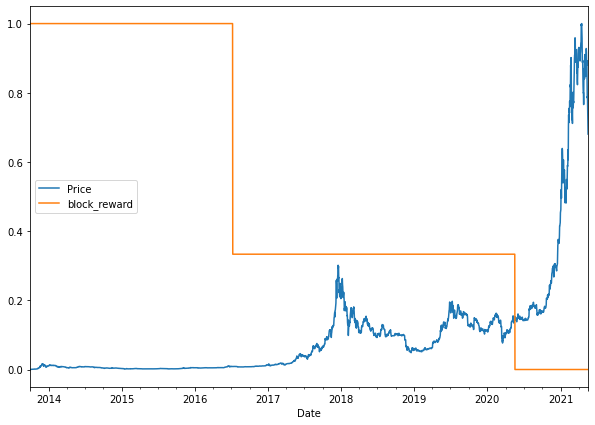

In [100]:
# Plotting block reward vs price over time
from sklearn.preprocessing import minmax_scale

scaled_price_block_df = pd.DataFrame(
    minmax_scale(bitcoin_prices_block[["Price", "block_reward"]]),
    columns=bitcoin_prices_block.columns,
    index=bitcoin_prices_block.index
)
scaled_price_block_df.plot(figsize=(10, 7))